# [Manual de R](https://fhernanb.github.io/Manual-de-R/)

# Estadística
La misión de la **Estadistica Descriptiva** es ordenar, describir y sintetizar la información recogida.<br>
La **población** es un conjunto de elementos, con alguna caracteristica común, que es el objeto de nuestro estudio. Esta puede ser finita o infinita.<br>
Una **muestra** es un subconjunto de la población. El número de elemento de una muestra se llama **tamaño** de la muestra.<br>
El objeto de nuestra medida puede ser: Cuntitativo o Cualitativo.<br>
Se entiende por **variable estadística** al símbolo que representa al dato o caracter objeto de nuestro estudio de los elementos de la muestra y que puede tomar un conjunto de valores. Estos pueden ser discretos, continuos, unidimensionales(temperatura o presión atmoférica), bidimensionales(longitud y peso de una barra conductora) o n-dimensionales(velocidad, carga eléctrica y masa de un ión es tridimensionales).
## Tabla de frecuencia

### Variable cuantitativa discreta

In [2]:
num_hijos <- c(2,1,1,3,1,2,5,1,2,3,4,2,3,2,1,4,2,3,2,1)
N <- length(num_hijos) #tamaño de la muestra
print(paste("Números de hijos:",N))

[1] "Números de hijos: 20"


In [3]:
#Frecuencia absoluta
tabla <- table(num_hijos)
tabla

num_hijos
1 2 3 4 5 
6 7 4 2 1 

In [4]:
#Frecuencia acumulada
FreqAc <- cumsum(table(num_hijos))
FreqAc

1  2  3  4  5 
 6 13 17 19 20

In [5]:
#Frecuencia relativa
FreqRel <- table(num_hijos) / N
FreqRel

num_hijos
   1    2    3    4    5 
0.30 0.35 0.20 0.10 0.05 

In [6]:
#Frecuencia relativa en tanto %
FreqRelPor100 <- (table(num_hijos)/N)*100
FreqRelPor100

num_hijos
 1  2  3  4  5 
30 35 20 10  5 

In [7]:
#Frecuencia relativa acumulada en tanto porciento
FreqRelAcPor100 <- (cumsum(table(num_hijos))/N)*100
FreqRelAcPor100

1   2   3   4   5 
 30  65  85  95 100

In [8]:
transform(tabla,
         FreqAc=FreqAc)

,num_hijos,Freq,FreqAc
,<fct>,<int>,<int>
1,1,6,6
2,2,7,13
3,3,4,17
4,4,2,19
5,5,1,20


In [9]:
df_num_hijos <- as.data.frame(table(num_hijos))
df_num_hijos

num_hijos,Freq
<fct>,<int>
1,6
2,7
3,4
4,2
5,1


In [10]:
transform(df_num_hijos,
          FreqAc=cumsum(df_num_hijos$Freq),
          FreqRe=prop.table(df_num_hijos$Freq),
          FreqReAc=cumsum(prop.table(df_num_hijos$Freq)))

num_hijos,Freq,FreqAc,FreqRe,FreqReAc
<fct>,<int>,<int>,<dbl>,<dbl>
1,6,6,0.30,0.30
2,7,13,0.35,0.65
3,4,17,0.20,0.85
4,2,19,0.10,0.95
5,1,20,0.05,1.00


## Ejemplo de tabla de frecuencia

El paquete ***dplyr*** contiene una colección de funciones para realizar operaciones de manipulación de datos comunes como: filtrar por fila, seleccionar columnas específicas, reordenar filas, añadir nuevas filas y agregar datos.<br>
***readxl*** es un paquete diseñado para hacer una sola tarea: importar hojas de Excel a R

In [13]:
library(readxl)
library(dplyr)

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.1"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [14]:
df_eje2122 <- read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/PedidosEjercicios/pedidosConCodigoEjercicio21-22.XLSX")
#Cambio los nomrbres de columnas
colnames(df_eje2122)<- c('Centro','Almacen','FechaDoc','Cl','Doc','Prov','Pos','UM','Material','CantPed',
                         'CantBase','PorEntr','Gpo','Contrato','Cesta','Ref','Borrado','TipoImp','Incom')

In [15]:
df_1126 <- as.data.frame(table(as.data.frame(table(select(filter(df_eje2122,Almacen=='1126'),Material)))$Freq))

In [16]:
transform(df_1126,
         FrecAbsAcum=cumsum(df_1126$Freq),
         FrecRel=round(prop.table(df_1126$Freq),3),
         FrecRelAcum=round(cumsum(prop.table(df_1126$Freq)),3))

Var1,Freq,FrecAbsAcum,FrecRel,FrecRelAcum
<fct>,<int>,<int>,<dbl>,<dbl>
1,1669,1669,0.379,0.379
2,1265,2934,0.288,0.667
3,800,3734,0.182,0.849
4,437,4171,0.099,0.948
5,150,4321,0.034,0.982
6,46,4367,0.010,0.993
7,18,4385,0.004,0.997
8,8,4393,0.002,0.999
9,2,4395,0.000,0.999


**Recorrido o Rango**: La diferencia entre el valor mayor y menor que toma la variable.<br>
**Frecuencia absoluta $n_i$**: Definida como el número de veces que aparece el valor en cuestión de la variable estadística en el conjunto de las observaciones realizadas.<br>
**Frecuencia relativa $f_i$**: Cociente entre la frecuencia absoluta y el número de observaciones realizadas N.<br>
**Frecuencia absoluta acumulada $N_i$**: Suma de las frecuencias absolutas de los valores inferiores o igual a $x_i$.<br>
**Frecuencia ralativa acumulada $F_i$**: Cociente entre la frecuencia absoluta acumulada y el número de observaciones.<br>

## Agrupamiento en intervalos de clase (usando fdth)

In [ ]:
#install.packages("fdth")

***fdth*** Frequency Distribution Tables, Histograms and Polygons

In [17]:
library(fdth)

Warning message:
"package 'fdth' was built under R version 4.1.3"

Attaching package: 'fdth'


The following objects are masked from 'package:stats':

    sd, var




In [18]:
ejemploI6 <- c(8.63,10.16,8.50,8.31,10.80,7.50,8.12,
               8.42,9.20,8.16,8.36,9.77,7.52,7.96,
               7.83,8.62,7.54,8.28,9.32,7.96,7.47)

In [19]:
recorrido <- max(ejemploI6) - min(ejemploI6)
print(paste("máximo: ",max(ejemploI6)))
print(paste("mínimo: ",min(ejemploI6)))
print(paste("recorrido:",recorrido))

[1] "máximo:  10.8"
[1] "mínimo:  7.47"
[1] "recorrido: 3.33"


In [21]:
N = length(ejemploI6)
k = round(N**(0.5),0) #k es el número de intervalos
print(paste("Tamaño de la muestra: ",N))
print(paste("número de intervalos ",k))

[1] "Tamaño de la muestra:  21"
[1] "número de intervalos  5"


In [22]:
dist <- fdt(ejemploI6,start=7.40,end=10.9,h=5)
dist

Class limits,f,rf,rf(%),cf,cf(%)
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"[7.467,7.946)",5,0.23809524,23.809524,5,23.80952
"[7.946,8.421)",8,0.38095238,38.095238,13,61.90476
"[8.421,8.897)",3,0.14285714,14.285714,16,76.19048
"[8.897,9.373)",2,0.09523810,9.523810,18,85.71429
"[9.373,9.849)",1,0.04761905,4.761905,19,90.47619
"[9.849,10.32)",1,0.04761905,4.761905,20,95.23810
"[10.32,10.8)",1,0.04761905,4.761905,21,100.00000


# Frecuencias de compras en almacenes (Ejercicio 20/21)

In [ ]:
library(readxl)
library(dplyr)

In [23]:
df_eje2122 <- read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/PedidosEjercicios/pedidosConCodigoEjercicio21-22.XLSX")
#Cambio los nomrbres de columnas
colnames(df_eje2122)<- c('Centro','Almacen','FechaDoc','Cl','Doc','Prov','Pos','UM','Material','CantPed',
                         'CantBase','PorEntr','Gpo','Contrato','Cesta','Ref','Borrado','TipoImp','Incom')

In [24]:
table(as.data.frame(table(select(filter(df_eje2122,Almacen=='1126'),Material)))$Freq)


   1    2    3    4    5    6    7    8    9   10   18 
1669 1265  800  437  150   46   18    8    2    1    2 

In [25]:
table(as.data.frame(table(select(filter(df_eje2122,Almacen=='1124'),Material)))$Freq)


   1    2    3    4    5    6    7    8    9   11   12   29 
1454 1079  622  294  113   49   27    9    2    1    1    1 

In [26]:
table(as.data.frame(table(select(filter(df_eje2122,Almacen=='1128'),Material)))$Freq)


  1   2   3   4   5   6   7 
869 452 200  67  33   8   2 

In [27]:
table(as.data.frame(table(select(filter(df_eje2122,Almacen=='1129'),Material)))$Freq)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 21 23 33 34 
42 21 20 19 16  8  9  4  7  4  6  3  1  1  2  2  2  1  2  1  1 

### Variable cualitativa

In [28]:
color_ojos <- c('azul','verde','marrón','gris','verde','marrón','marrón','azul','verde','marrón','gris','azul','marrón','verde')
N1 <- length(color_ojos)

In [29]:
tabla_color <- table(color_ojos)
tabla_color

color_ojos
  azul   gris marrón  verde 
     3      2      5      4 

In [30]:
FreqAc <- cumsum(table(color_ojos))
FreqAc

azul   gris marrón  verde 
     3      5     10     14

In [31]:
transform(tabla_color,
         FreqAc=FreqAc)

,color_ojos,Freq,FreqAc
,<fct>,<int>,<int>
azul,azul,3,3
gris,gris,2,5
marrón,marrón,5,10
verde,verde,4,14


In [32]:
as.data.frame(table(color_ojos))$Freq

[1] 3 2 5 4

# Importar archivos de Excel

In [ ]:
library(readxl)
library(dplyr)#Para el uso de filter y select

In [33]:
ej20_21 <- read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/PedidosEjercicios/pedidosConCodigoEjercicio20-21.XLSX")
colnames(ej20_21)<- c('Centro','Almacen','FechaDoc','Cl','Doc','Prov','Pos','UM','Material','CantPed',
                         'CantBase','PorEntr','Gpo','Contrato','Cesta','Ref','Borrado','TipoImp','Incom')

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in R8346 / R8346C18: got 'K'"
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in S16862 / R16862C19: got 'X'"
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in S24962 / R24962C19: got 'X'"
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in S28932 / R28932C19: got 'X'"
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in R30271 / R30271C18: got 'K'"


In [34]:
ej21_22 <- read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/PedidosEjercicios/pedidosConCodigoEjercicio21-22.XLSX")
colnames(ej21_22)<- c('Centro','Almacen','FechaDoc','Cl','Doc','Prov','Pos','UM','Material','CantPed',
                         'CantBase','PorEntr','Gpo','Contrato','Cesta','Ref','Borrado','TipoImp','Incom')

## filter()

In [35]:
head(filter(ej21_22,Almacen=='1124'),4)

Centro,Almacen,FechaDoc,Cl,Doc,Prov,Pos,UM,Material,CantPed,CantBase,PorEntr,Gpo,Contrato,Cesta,Ref,Borrado,TipoImp,Incom
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,1,C/U,1037352,2,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,2,C/U,1037353,6,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,3,C/U,1037354,1,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-02,ZOP,4500172380,801546 WHEELPAM S.A.,10,C/U,1012499,2,1,0,D18,NA,NA,DDONAIRE,NA,NA,NA


In [36]:
head(filter(ej21_22,Almacen=='1124',UM=='C/U'),5)

Centro,Almacen,FechaDoc,Cl,Doc,Prov,Pos,UM,Material,CantPed,CantBase,PorEntr,Gpo,Contrato,Cesta,Ref,Borrado,TipoImp,Incom
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,1,C/U,1037352,2,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,2,C/U,1037353,6,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-01,ZOP,4800137401,804038 ANDRES N. BERTOTTO S.A.I,3,C/U,1037354,1,1,0,D19,NA,3000721193,NA,NA,NA,NA
1007,1124,2021-06-02,ZOP,4500172380,801546 WHEELPAM S.A.,10,C/U,1012499,2,1,0,D18,NA,NA,DDONAIRE,NA,NA,NA
1007,1124,2021-06-02,ZOP,4800137375,802853 KSB CIA.SUDAM. DE BOMBAS,1,C/U,1031042,4,1,0,D49,NA,3000720422,HUANCODA,NA,NA,NA


In [37]:
help(filter)

## select()

In [38]:
head(select(ej20_21,Material),3)

Material
<chr>
1056412
1050053
1030923


In [40]:
tail(select(ej20_21,c(Centro,Almacen,Material)),5)

Centro,Almacen,Material
<chr>,<chr>,<chr>
1002,1128,1014104
1001,1126,1051268
1001,1126,1051269
1001,1126,1034608
1002,1129,1000067


# dplyr

In [ ]:
library(dplyr)

In [41]:
nombre <- c('Emanuel','Maximiliano','Claudia','Sara','Sebastian')
edad <- c(24,23,45,68,37)
sexo <- c('masculino','masculino','femenino','femenino','masculino')

In [42]:
dataf <- data.frame(nombre,edad,sexo)
dataf

nombre,edad,sexo
<chr>,<dbl>,<chr>
Emanuel,24,masculino
Maximiliano,23,masculino
Claudia,45,femenino
Sara,68,femenino
Sebastian,37,masculino


In [43]:
filter(dataf,sexo=='femenino')

nombre,edad,sexo
<chr>,<dbl>,<chr>
Claudia,45,femenino
Sara,68,femenino


In [44]:
select(dataf,nombre,edad)

nombre,edad
<chr>,<dbl>
Emanuel,24
Maximiliano,23
Claudia,45
Sara,68
Sebastian,37


In [45]:
t_sexo <- table(dataf$sexo)
t_sexo


 femenino masculino 
        2         3 

## tabla a data frame

In [46]:
df_sexo <- as.data.frame(t_sexo)
df_sexo

Var1,Freq
<fct>,<int>
femenino,2
masculino,3


In [47]:
str(t_sexo)

 'table' int [1:2(1d)] 2 3
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:2] "femenino" "masculino"


## str()

In [48]:
nombre <- c('Emanuel','Maximiliano','Claudia','Sara','Sebastian')
edad <- c(24,23,45,68,37)
sexo <- c('masculino','masculino','femenino','femenino','masculino')
dataf <- data.frame(nombre,edad,sexo)

In [49]:
str(dataf)

'data.frame':	5 obs. of  3 variables:
 $ nombre: chr  "Emanuel" "Maximiliano" "Claudia" "Sara" ...
 $ edad  : num  24 23 45 68 37
 $ sexo  : chr  "masculino" "masculino" "femenino" "femenino" ...


In [50]:
str(nombre)

 chr [1:5] "Emanuel" "Maximiliano" "Claudia" "Sara" "Sebastian"


In [51]:
tabla <- table(dataf$sexo)

In [52]:
str(tabla)

 'table' int [1:2(1d)] 2 3
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:2] "femenino" "masculino"


## rnorm

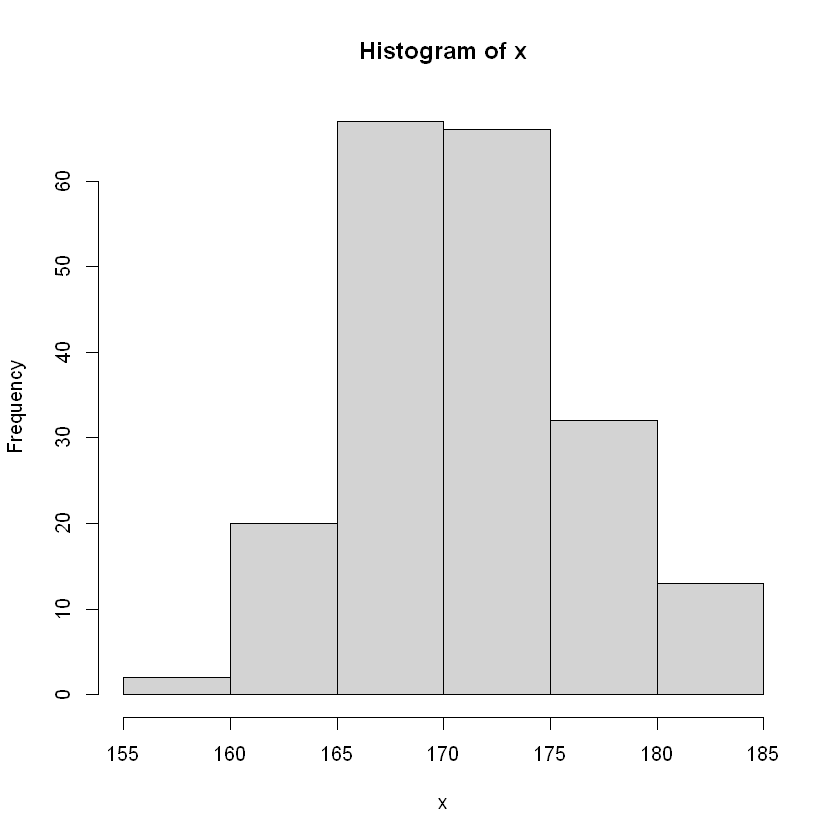

In [53]:
x <- rnorm(n=200, mean=170, sd=5)
hist(x)

## Histograma

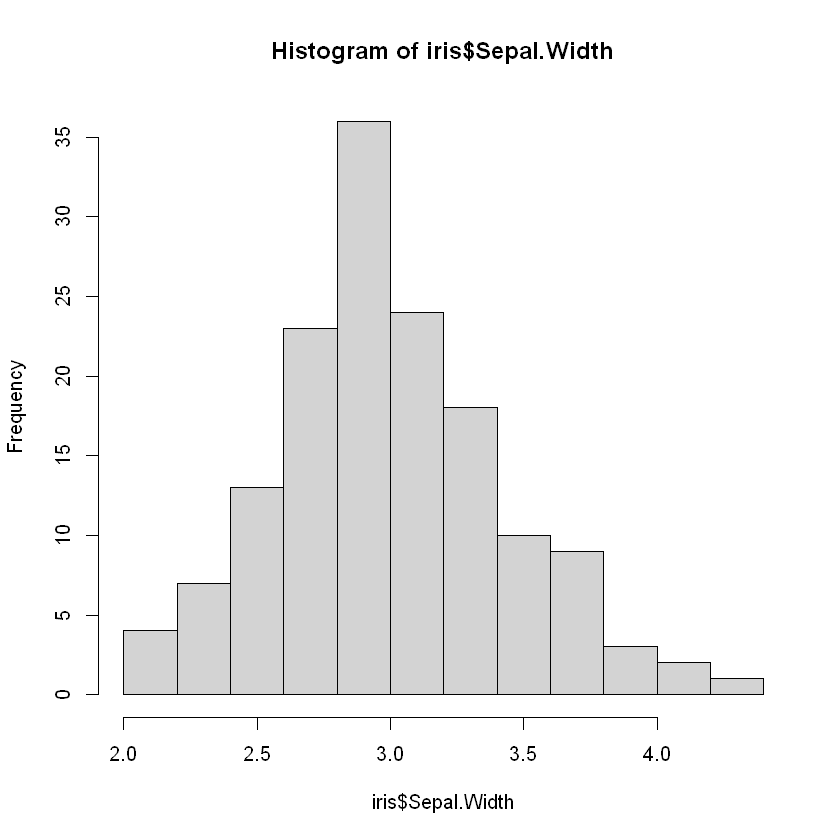

In [54]:
hist(iris$Sepal.Width)

In [55]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [56]:
fechas <- c('14/3/2022','7/6/2022','9/6/2022','9/6/2022','9/6/2022','9/6/2022','9/6/2022','9/6/2022','9/6/2022','9/6/2022',
            '9/6/2022','9/6/2022','9/6/2022','10/6/2022','13/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022',
            '16/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022','16/6/2022')

In [58]:
table(fechas)/length(fechas)*100

fechas
10/6/2022 13/6/2022 14/3/2022 16/6/2022  7/6/2022  9/6/2022 
 3.571429  3.571429  3.571429 46.428571  3.571429 39.285714 

In [59]:
table(fechas)/length(fechas)*100

fechas
10/6/2022 13/6/2022 14/3/2022 16/6/2022  7/6/2022  9/6/2022 
 3.571429  3.571429  3.571429 46.428571  3.571429 39.285714 

# Tabla de frecuencias (distintas distribuciones)

## Distribución uniforme entre cero y uno
Esta distribución se usa cuando todos los elementos de la población tienen identica probabilidad
de aparecer en nuetra muestra. También se llama rectangular.

In [60]:
#sumulemos 1000 uniformes entre cero y uno
x <- runif(1000)

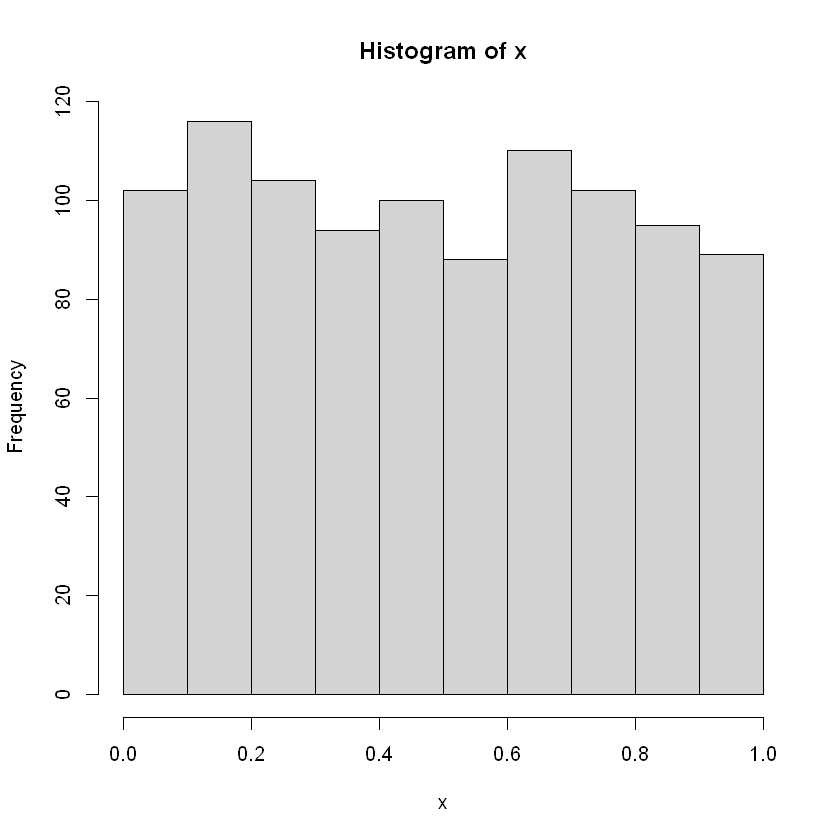

In [61]:
hist(x)

In [62]:
#Generamos el números de clases con la regla sturges:
k <- nclass.Sturges(x)
k

[1] 11

In [63]:
#Separamos los valores de x en k intervalos de clases
intervalos <- cut(x,breaks=k)

In [64]:
# Calculamos las frecuencias absolutas(cuantos elementos caen en cada clase)
FA <- table(intervalos)
FA

intervalos
(-0.000567,0.0913]     (0.0913,0.182]      (0.182,0.273]      (0.273,0.364] 
                91                104                 95                 91 
     (0.364,0.455]      (0.455,0.545]      (0.545,0.636]      (0.636,0.727] 
                86                 86                 94                 88 
     (0.727,0.818]      (0.818,0.909]          (0.909,1] 
                97                 83                 85 

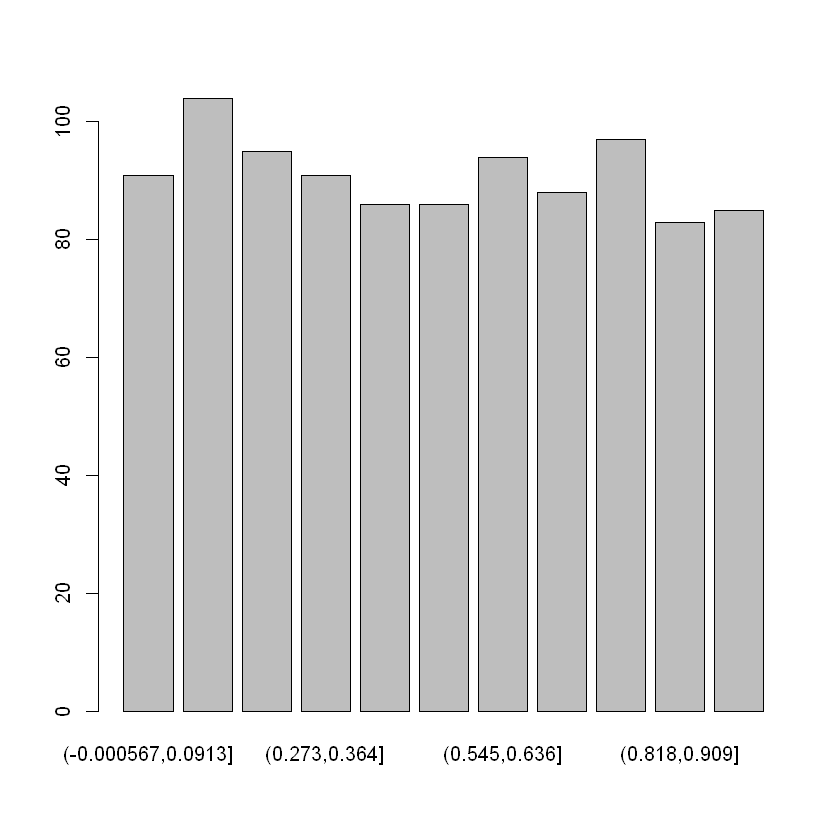

In [65]:
barplot(FA)

In [66]:
#Para obtener las frecuencias relativas(tenemos la probabilidad de caer en cada clase)
FR <- FA <- table(intervalos)/length(x)
FR

intervalos
(-0.000567,0.0913]     (0.0913,0.182]      (0.182,0.273]      (0.273,0.364] 
             0.091              0.104              0.095              0.091 
     (0.364,0.455]      (0.455,0.545]      (0.545,0.636]      (0.636,0.727] 
             0.086              0.086              0.094              0.088 
     (0.727,0.818]      (0.818,0.909]          (0.909,1] 
             0.097              0.083              0.085 

In [67]:
class(FR)

[1] "table"

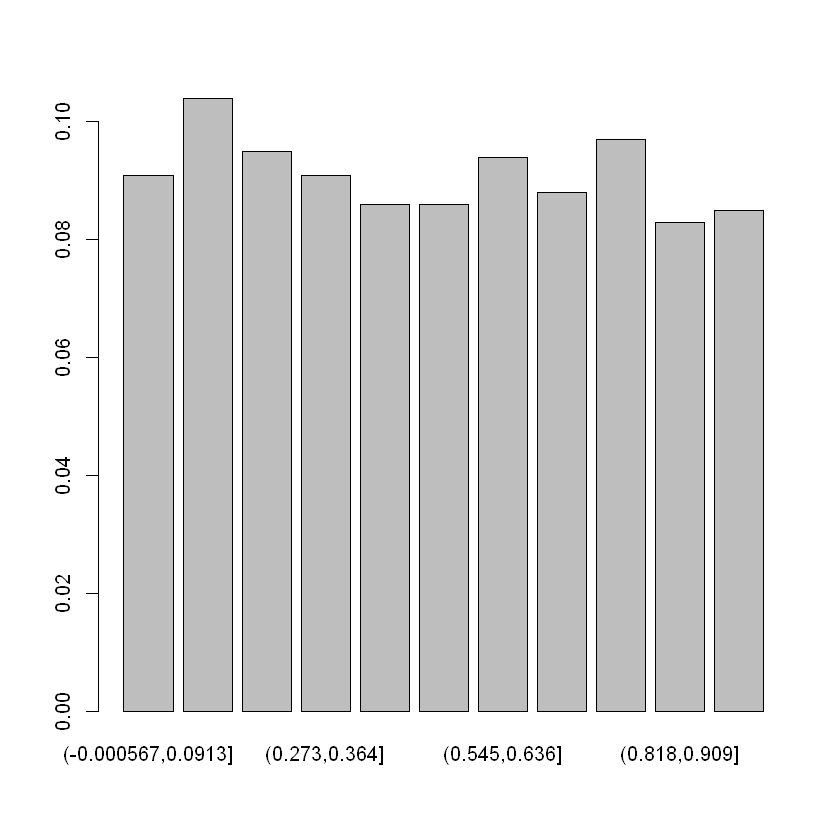

In [68]:
barplot(FR)

## Distribución normal estandar
Esta distribución se usa cuando la mayoría de los elementos de la población se acercan a la media y el comportamiento es
simétrico. Es la base del teorema del límite central y de muchas propiedades estadísticas.

In [69]:
#Sumulemos 1000 normales con media cero y ds uno:
y <- rnorm(1000)

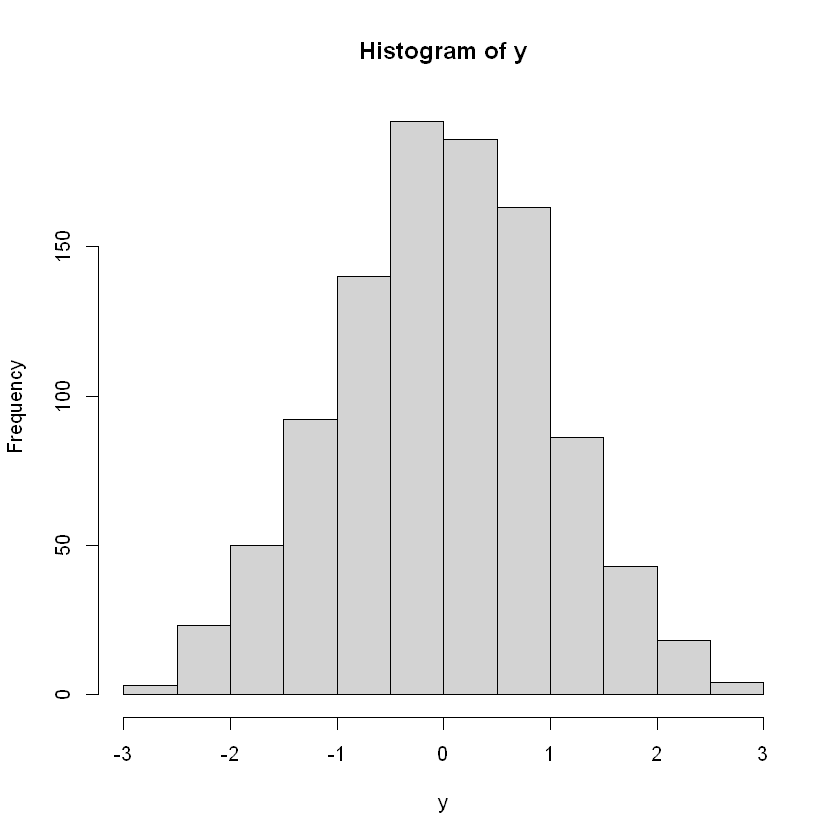

In [70]:
hist(y)

In [71]:
k2 <- nclass.Sturges(y)
k2

[1] 11

In [72]:
intervalos2 <- cut(y, breaks=k2)

In [73]:
FA2 <- table(intervalos2)
FA2

intervalos2
  (-2.93,-2.4]   (-2.4,-1.88]  (-1.88,-1.36] (-1.36,-0.834] (-0.834,-0.31] 
             5             31             56            113            164 
 (-0.31,0.214]  (0.214,0.737]   (0.737,1.26]    (1.26,1.78]    (1.78,2.31] 
           211            189            136             56             32 
   (2.31,2.84] 
             7 

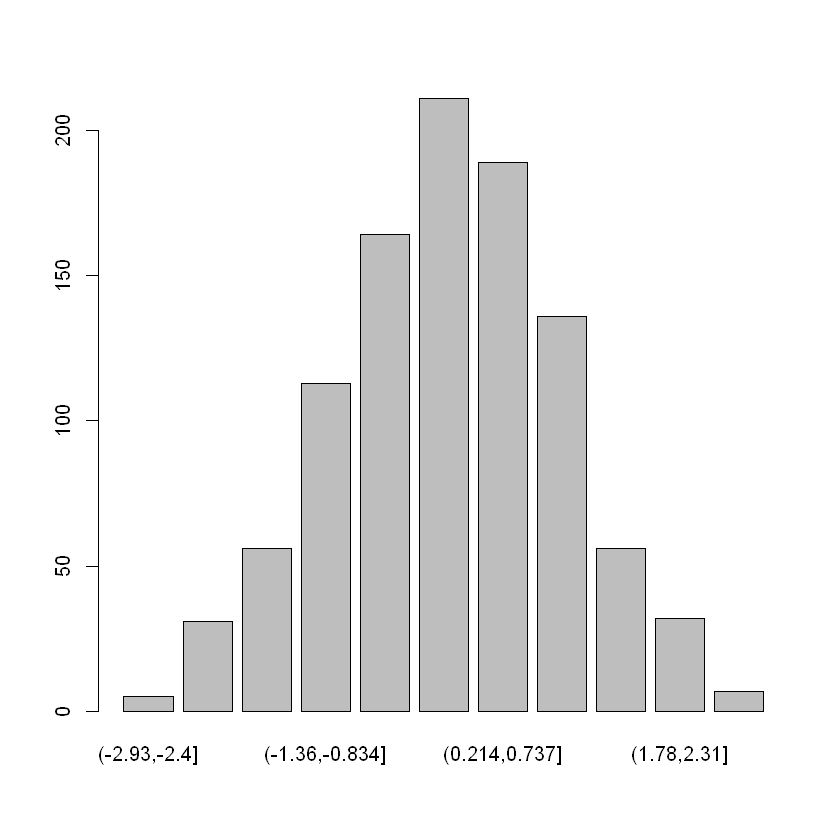

In [74]:
barplot(FA2)

In [75]:
FR2 <- table(intervalos2)/length(y)
FR2

intervalos2
  (-2.93,-2.4]   (-2.4,-1.88]  (-1.88,-1.36] (-1.36,-0.834] (-0.834,-0.31] 
         0.005          0.031          0.056          0.113          0.164 
 (-0.31,0.214]  (0.214,0.737]   (0.737,1.26]    (1.26,1.78]    (1.78,2.31] 
         0.211          0.189          0.136          0.056          0.032 
   (2.31,2.84] 
         0.007 

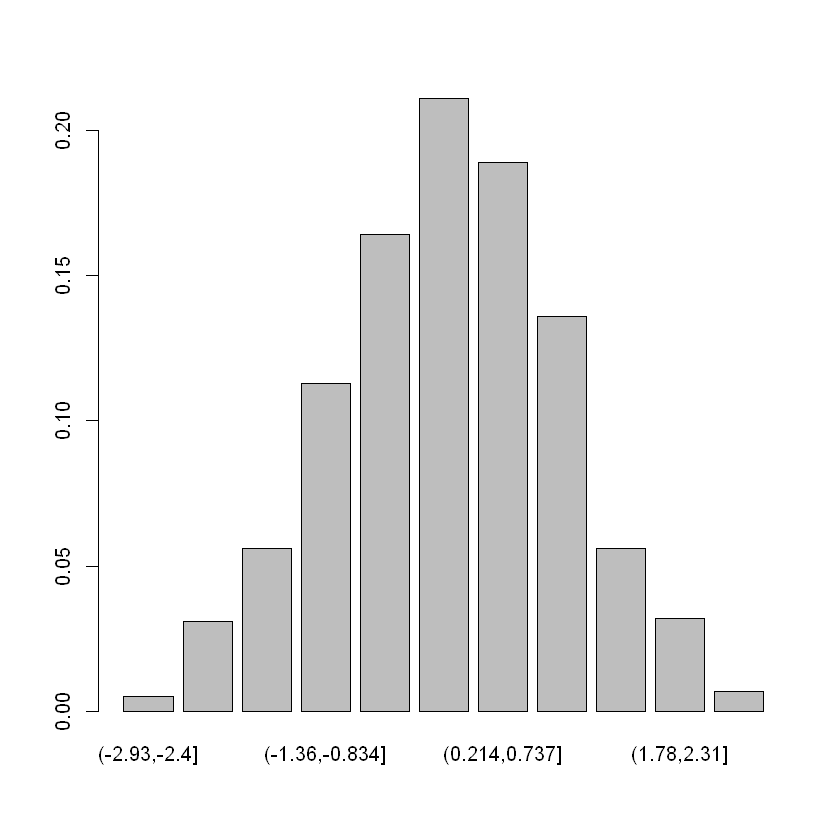

In [76]:
barplot(FR2)

## Distribución Exponencial
Esta distribución se usa cuando la x represnta tiempo entre ocurrencia de eventos. Por ejemplo tiempo entre la llegada
de dos autos a un estacionamiento.

In [77]:
z <- rexp(1000,rate=1)

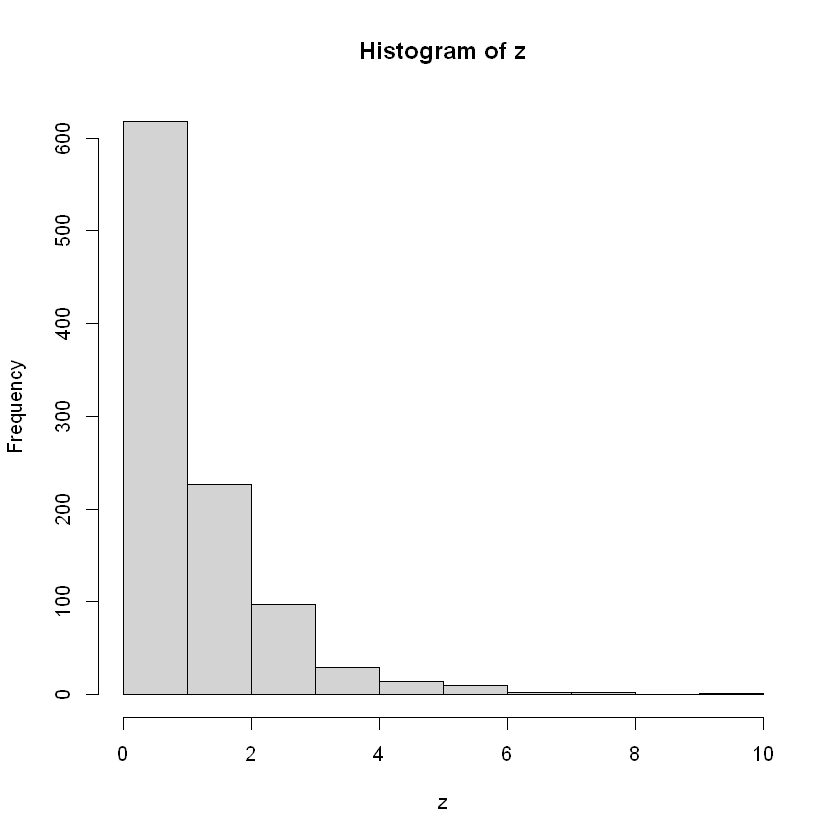

In [78]:
hist(z)

In [79]:
k3 <- nclass.Sturges(z)
k3

[1] 11

In [80]:
intervalos3 <- cut(z,breaks=k3)

In [81]:
FA3 <- table(intervalos3)
FA3

intervalos3
(-0.00798,0.862]     (0.862,1.72]      (1.72,2.58]      (2.58,3.44] 
             572              232              110               47 
      (3.44,4.3]       (4.3,5.16]      (5.16,6.02]      (6.02,6.88] 
              18                8                8                2 
     (6.88,7.75]      (7.75,8.61]      (8.61,9.48] 
               2                0                1 

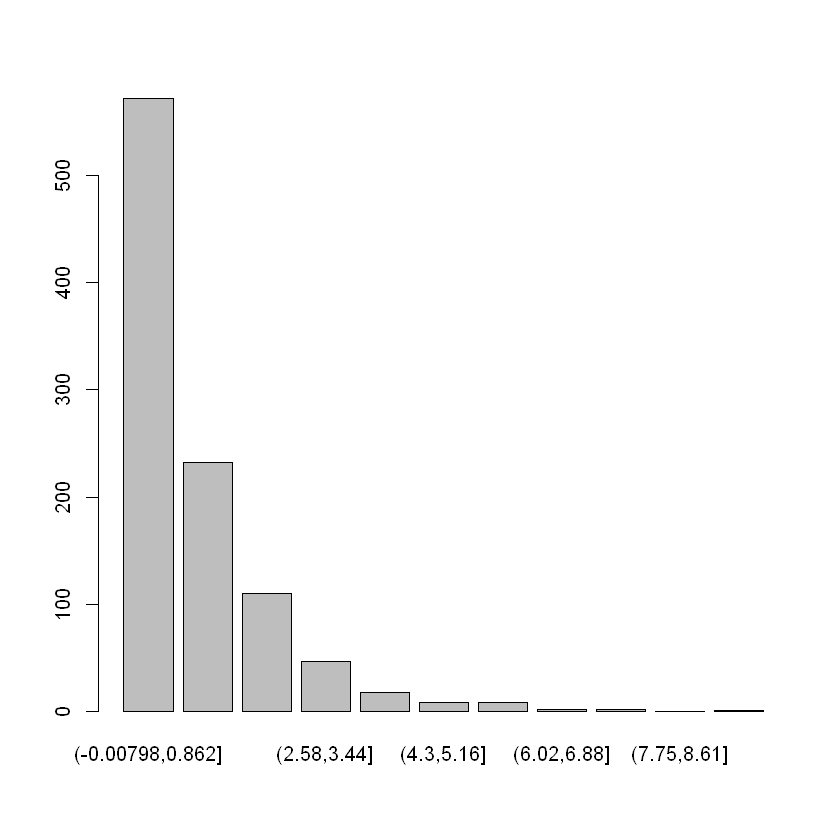

In [82]:
barplot(FA3)

In [83]:
FR3 <- table(intervalos3)/length(z)
FR3

intervalos3
(-0.00798,0.862]     (0.862,1.72]      (1.72,2.58]      (2.58,3.44] 
           0.572            0.232            0.110            0.047 
      (3.44,4.3]       (4.3,5.16]      (5.16,6.02]      (6.02,6.88] 
           0.018            0.008            0.008            0.002 
     (6.88,7.75]      (7.75,8.61]      (8.61,9.48] 
           0.002            0.000            0.001 

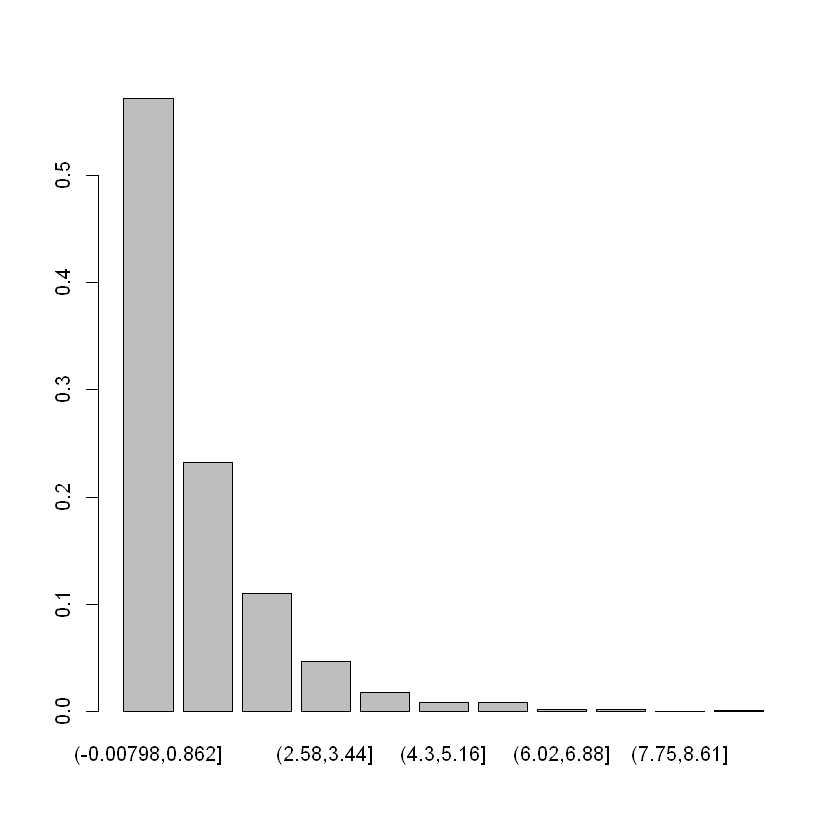

In [84]:
barplot(FR3)

## Distribución de Poisson
Estra distribución se usa cuando la h representa el número de ocurrencia por unidad de tiempo.
Por ejemplo, el número de llegadas de autos a un estacionamiento.

In [85]:
h <- rpois(1000,lambda=10) #10 es el promedio de ocurrencia por unidad de tiempo

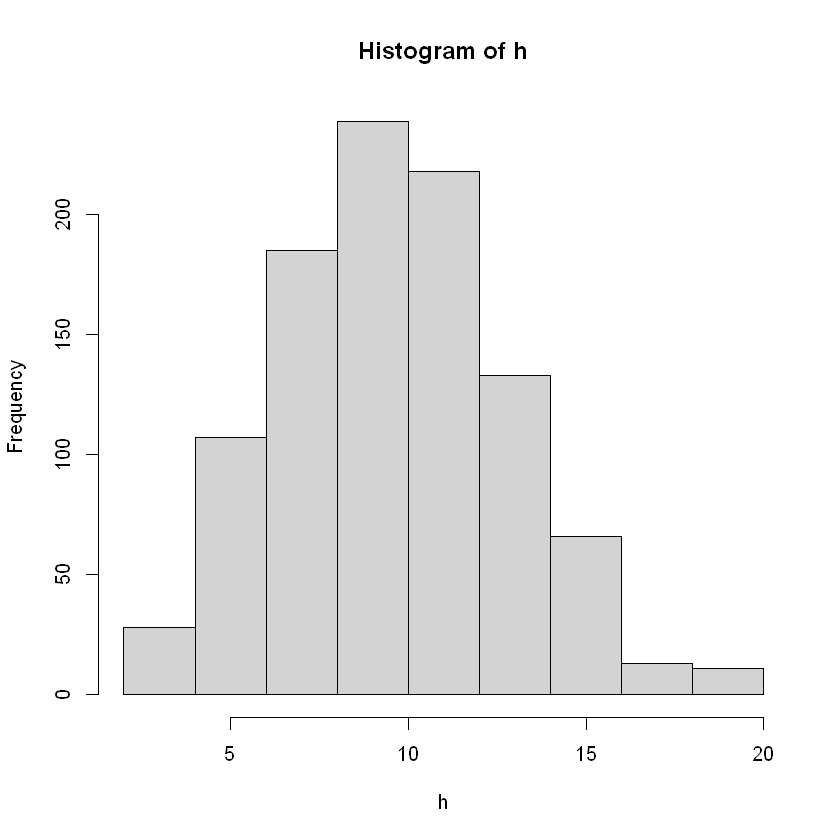

In [86]:
hist(h)

In [87]:
k4 <- nclass.Sturges(h)
k4

[1] 11

In [88]:
intervalos4 <- cut(h,breaks=k4)

In [89]:
FA4 <- table(intervalos4)
FA4

intervalos4
(1.98,3.64] (3.64,5.27] (5.27,6.91] (6.91,8.55] (8.55,10.2] (10.2,11.8] 
         13          66          56         185         239         123 
(11.8,13.5] (13.5,15.1] (15.1,16.7] (16.7,18.4]   (18.4,20] 
        173         101          20          13          11 

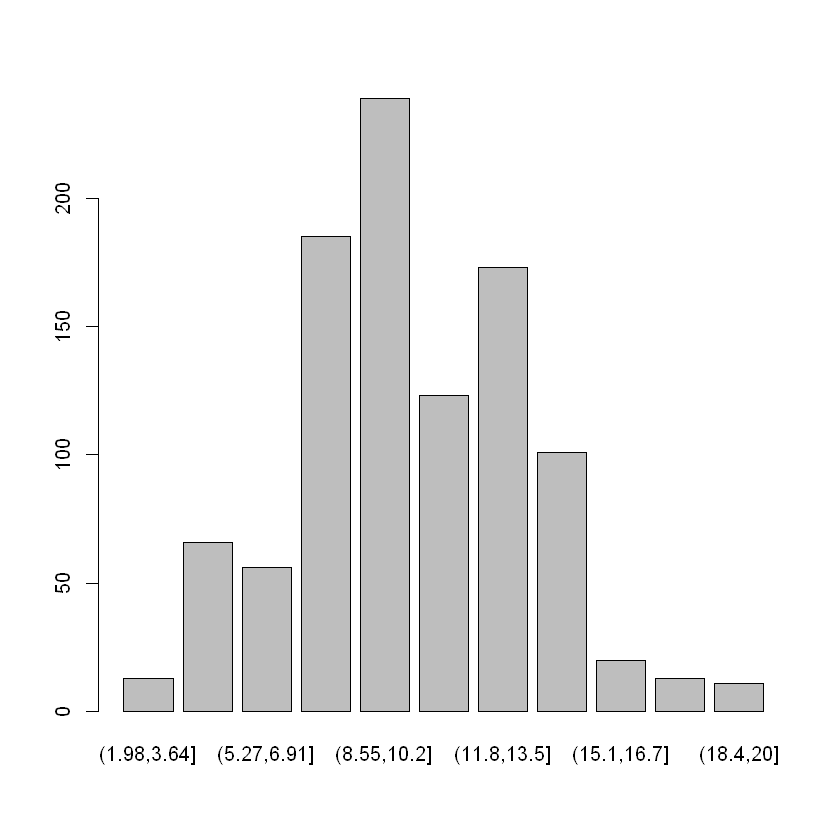

In [90]:
barplot(FA4)

In [91]:
FR4 <- table(intervalos4)/length(h)
FR4

intervalos4
(1.98,3.64] (3.64,5.27] (5.27,6.91] (6.91,8.55] (8.55,10.2] (10.2,11.8] 
      0.013       0.066       0.056       0.185       0.239       0.123 
(11.8,13.5] (13.5,15.1] (15.1,16.7] (16.7,18.4]   (18.4,20] 
      0.173       0.101       0.020       0.013       0.011 

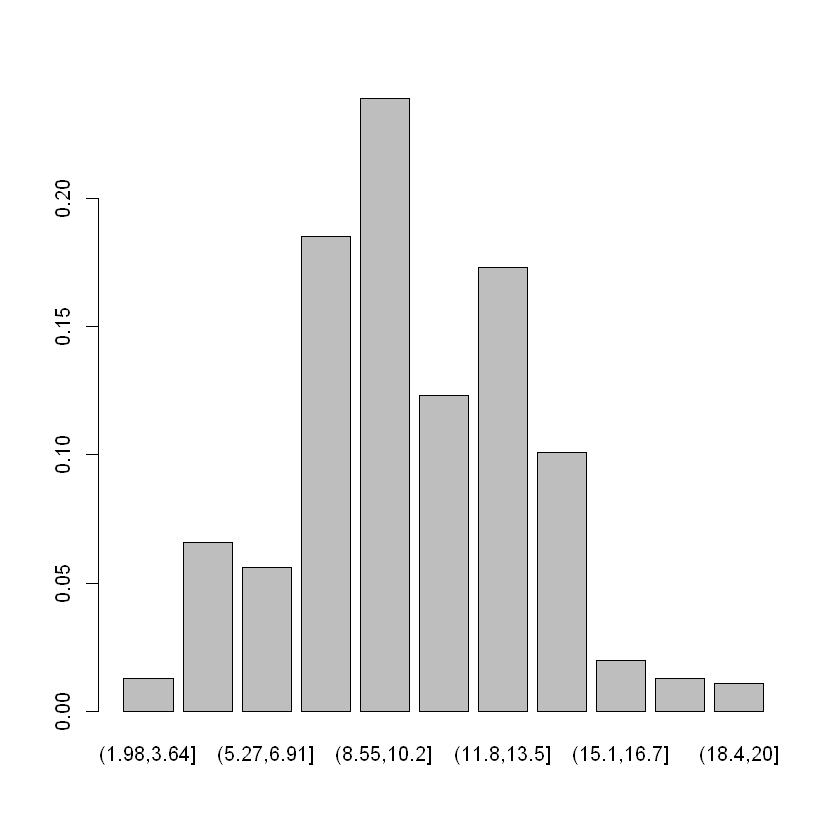

In [92]:
barplot(FR4)

# Representación gráfica para datos sin agrupar
Se usan:
* Diagrama de barra
* Polígono de frecuencia

# ggplot2

In [ ]:
#packageDescription("ggplot2")

## boxplot
* visualizar una variable numérica de diferentes grupos o categorías
* facilita la vida cuando comparamos varios grupos

In [93]:
datos <- c(23,24,24,25,29,31,31,33,34,24,36,36,37,39,39,40,41,45,40,20)
length(datos)

[1] 20

In [94]:
datos <- sort(datos)

In [95]:
datos

[1] 20 23 24 24 24 25 29 31 31 33 34 36 36 37 39 39 40 40 41 45

In [96]:
str(datos)

 num [1:20] 20 23 24 24 24 25 29 31 31 33 ...


### Cálculo de los cuartiles<br>
**1<sup>er</sup> Cuartil**: Primer valor al 25% de los datos, N=20, N/4=5, el 1er Cuartil es igual a la media aritmética entre este valor y el siguiente, (24+25)/2=24.5<br>
**2<sup>do</sup> Cuartil**:Mediana de los datos N/2=10, la mediana es la media aritmética de dicho valor y el siguiente, (33+34)/2=33.5<br>
**3<sup>er</sup> Cuartil**: Valor que sobre pasa al 75% de los datos 3N/4=15, la mediana es la media aritmética de dicho valor y el siguiente,(39+39)/2=39<br>
**Longitud de brazos(bigotes)**<br>
RIC = 3er cuartil - 1er cuartil<br>
Límite superior = 3er cuartil + 1.5 RIC<br>
Límite inferior = 1er cuartil - 1.5 RIC<br>
**Valores Raros(outliers)**<br>
Cualquier valor que sea más grande que 1.5 veces la distancia de la caja + cuartil 3 es un valor muy muy grande<br>

In [97]:
library(datasets)

In [98]:
data(iris)

In [99]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [100]:
head(iris,5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [101]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


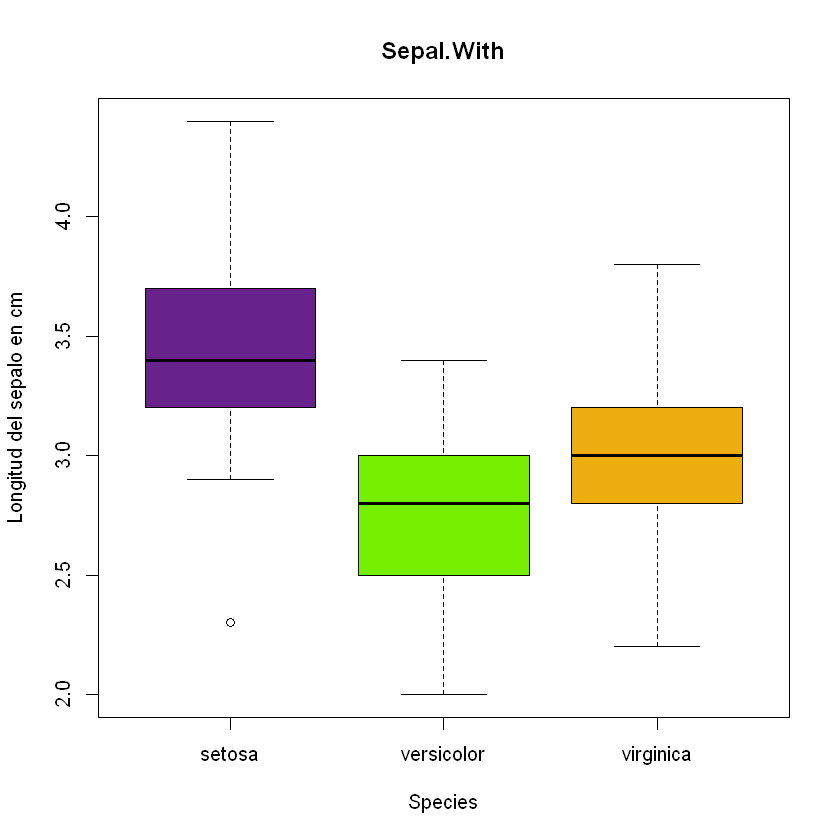

In [102]:
boxplot(Sepal.Width ~ Species,data=iris,
       main="Sepal.With",
       ylab="Longitud del sepalo en cm",
       col=c("darkorchid4","chartreuse2","darkgoldenrod2"))

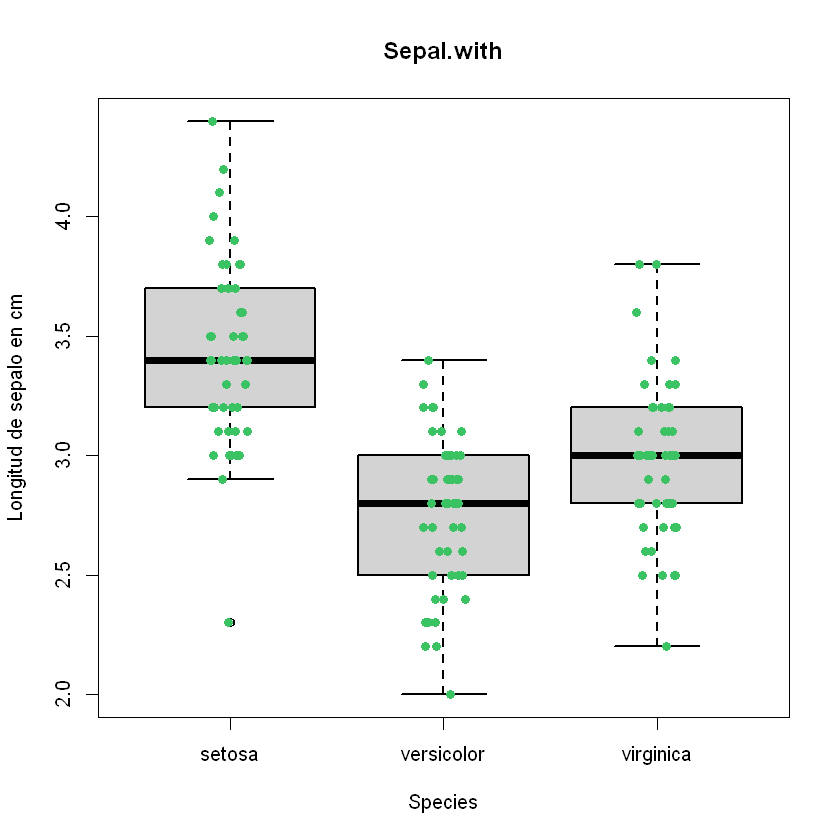

In [103]:
boxplot(Sepal.Width ~ Species,data=iris,lwd=2, main="Sepal.with",ylab="Longitud de sepalo en cm")
stripchart(Sepal.Width ~ Species, vertical=TRUE,data=iris,method="jitter",add=TRUE,pch=20,cex=1.5,col='#3AC263')

In [104]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.1.2"


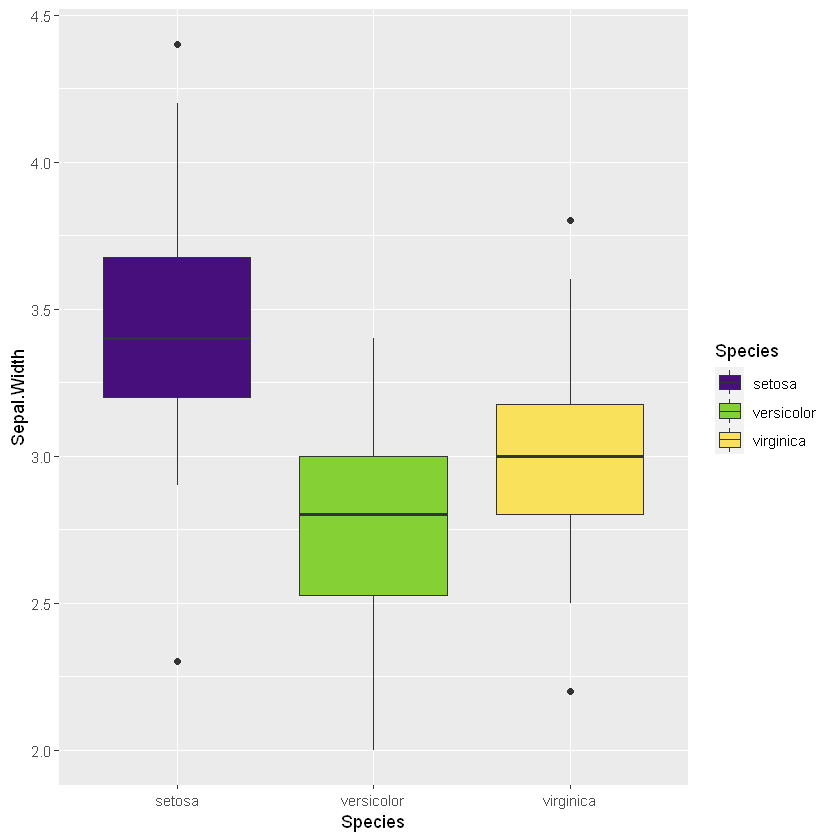

In [105]:
box <- ggplot(iris,aes(x=Species,
                      y=Sepal.Width,
                      fill=Species))
box + geom_boxplot() + scale_fill_manual(values=c('#460F7C','#85D135','#F9E15C'))

In [106]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.2     v purrr   0.3.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.1.1"
Warning message:
"package 'stringr' was built under R version 4.1.2"
Warning message:
"package 'forcats' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [107]:
data("diamonds")

In [108]:
head(diamonds,5)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [109]:
str(diamonds)

tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


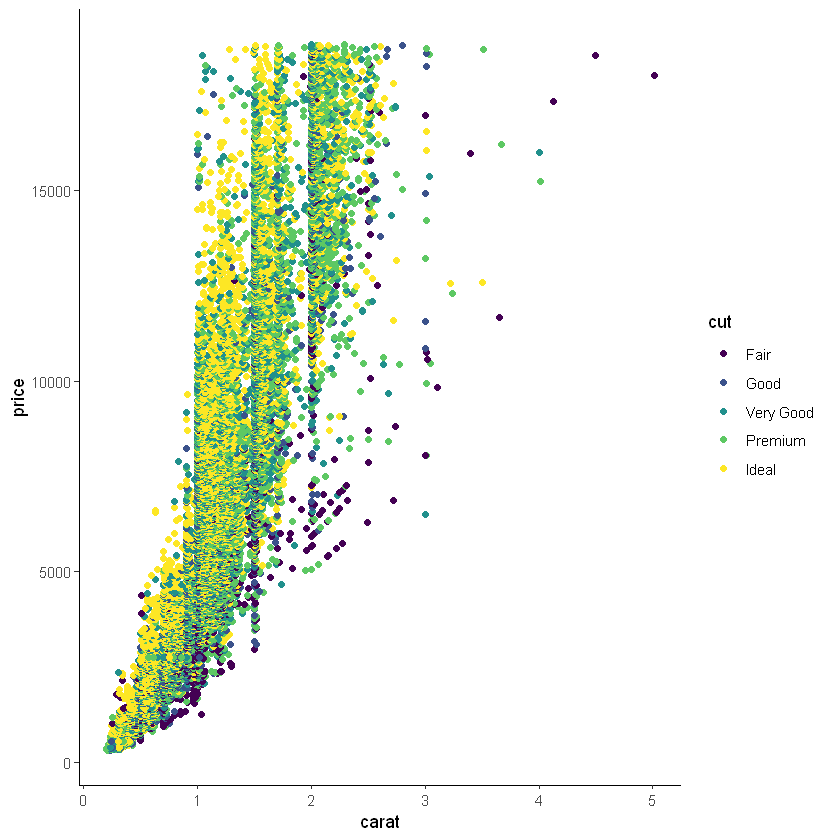

In [110]:
ggplot(diamonds,aes(x=carat,y=price))+geom_point(aes(color=cut))+theme_classic()

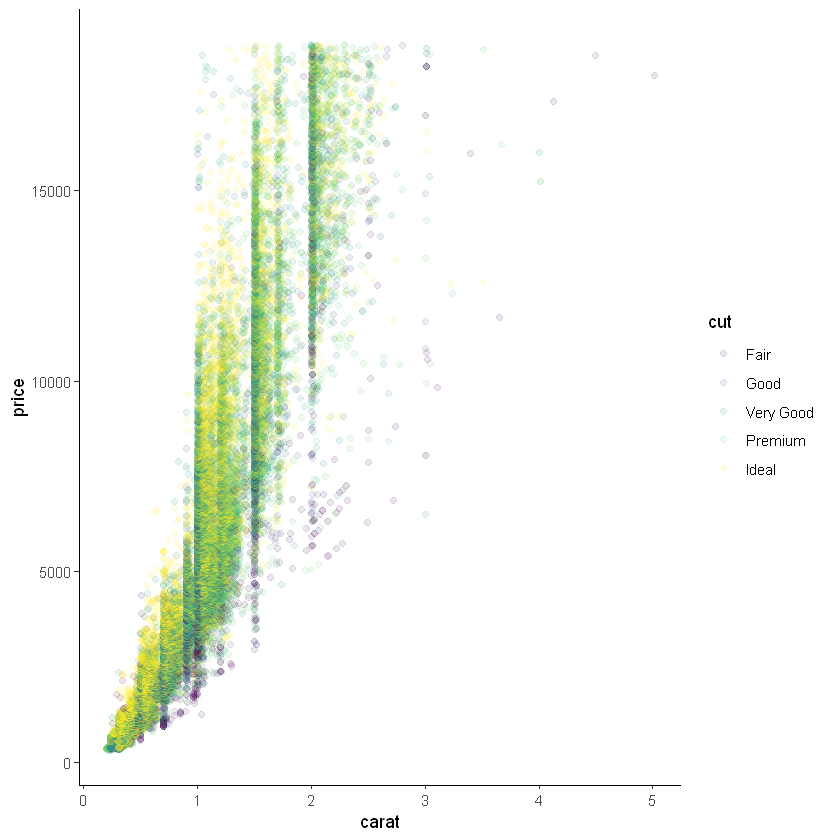

In [111]:
#usando alpha
ggplot(diamonds,aes(x=carat,y=price))+geom_point(aes(color=cut),alpha=0.1)+theme_classic()

In [112]:
data("mtcars")

In [113]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


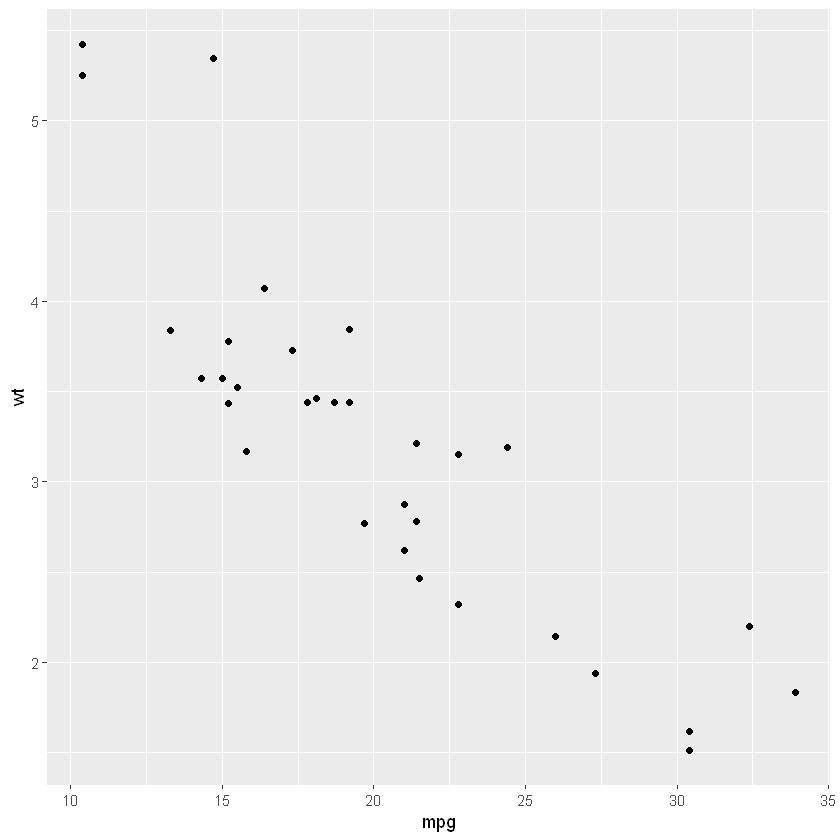

In [114]:
ggplot(mtcars,aes(x=mpg,y=wt))+geom_point() #+theme_classic(),theme_bw()

## Argumentos para geoms
* color: color de líneas o puntos
* alpha: transparencia de 0 a 1
* size: tamaño de puntos
* shape: tipo de punto
* fill: color dentro un área(barras, intervalos)

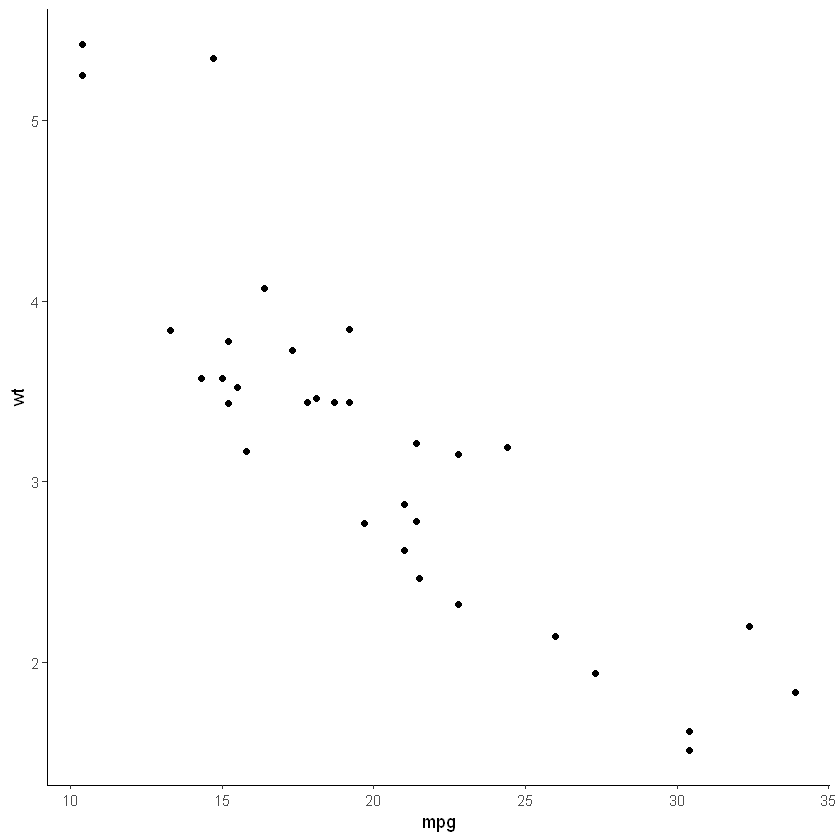

In [115]:
ggplot(mtcars,aes(x=mpg,y=wt))+geom_point()+theme_classic()

In [116]:
str(ChickWeight)

Classes 'nfnGroupedData', 'nfGroupedData', 'groupedData' and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


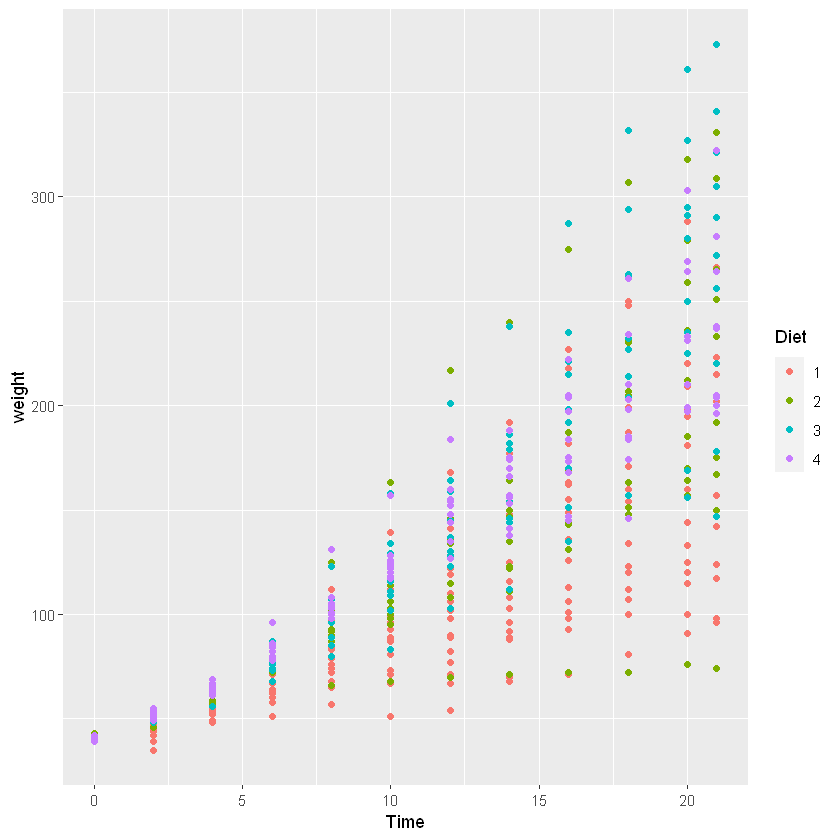

In [117]:
ggplot(ChickWeight,aes(x=Time,y=weight))+geom_point(aes(color=Diet))

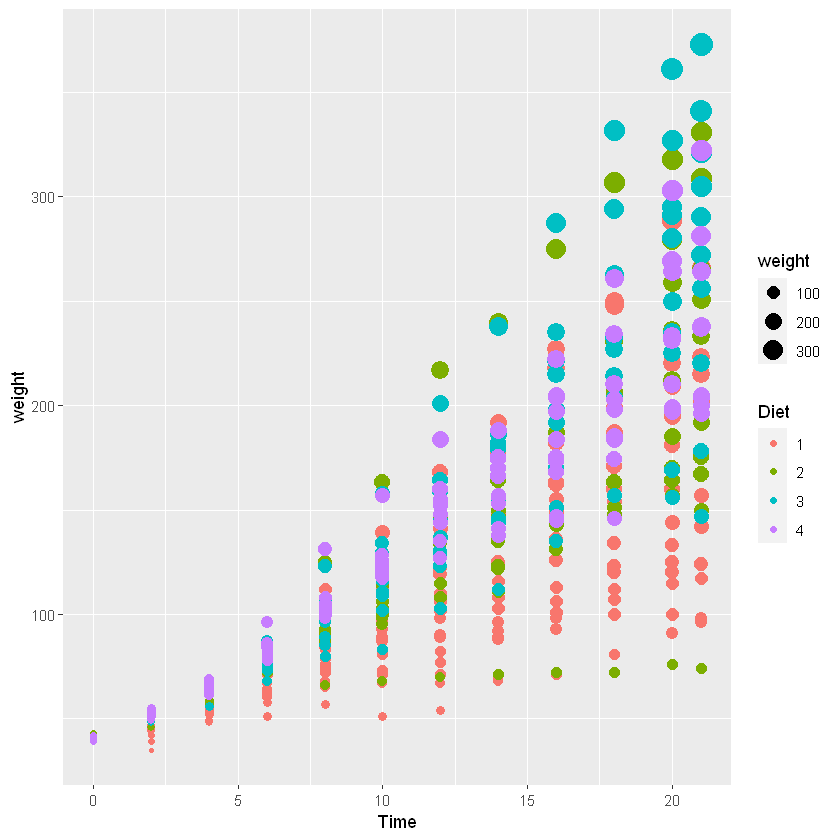

In [118]:
ggplot(ChickWeight,aes(x=Time,y=weight))+geom_point(aes(color=Diet,size=weight))

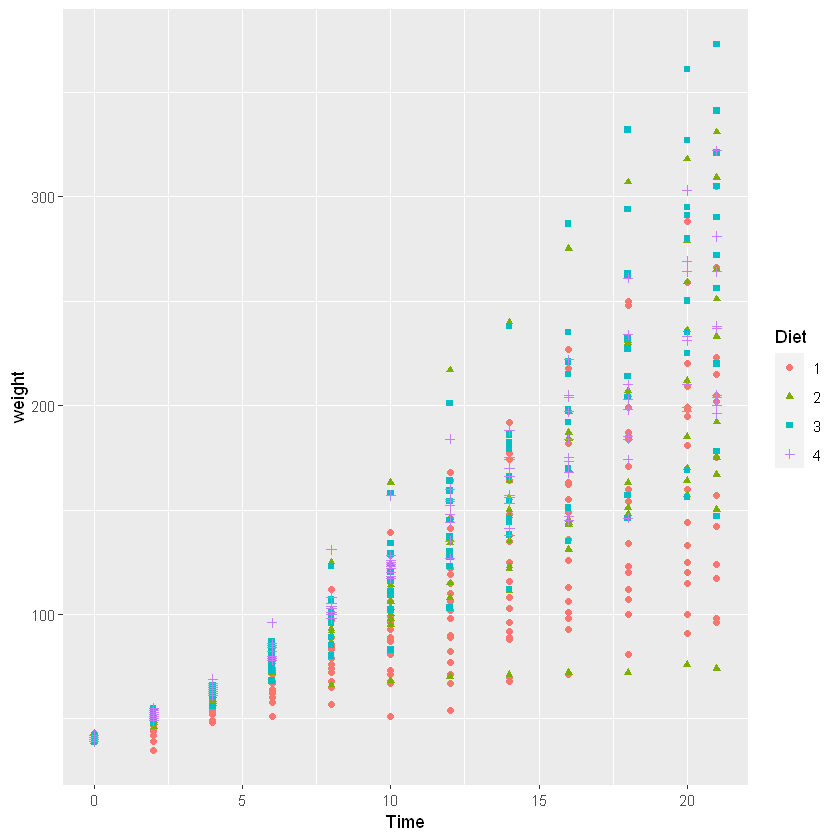

In [119]:
ggplot(ChickWeight,aes(x=Time,y=weight))+geom_point(aes(color=Diet,shape=Diet))

In [120]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


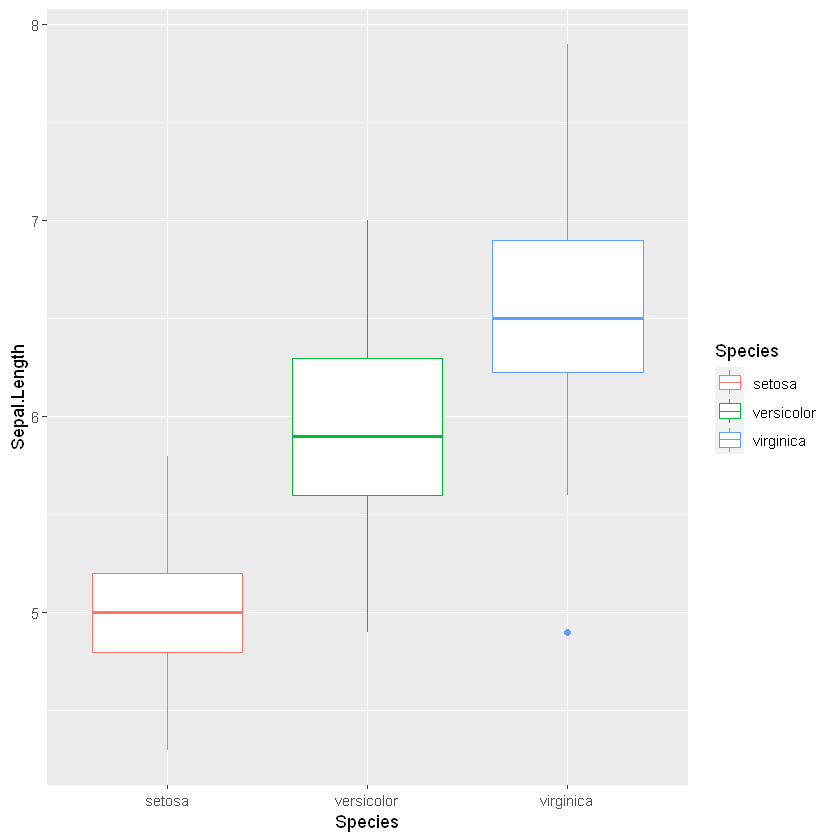

In [121]:
ggplot(iris,aes(x=Species,y=Sepal.Length))+geom_boxplot(aes(color=Species))

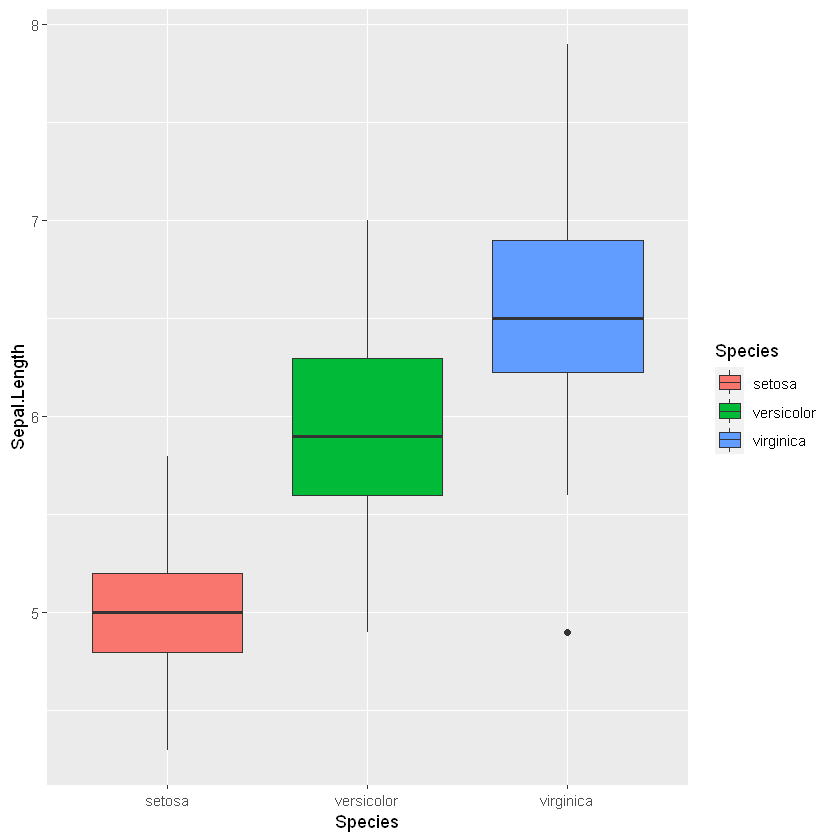

In [122]:
ggplot(iris,aes(x=Species,y=Sepal.Length))+geom_boxplot(aes(fill=Species))

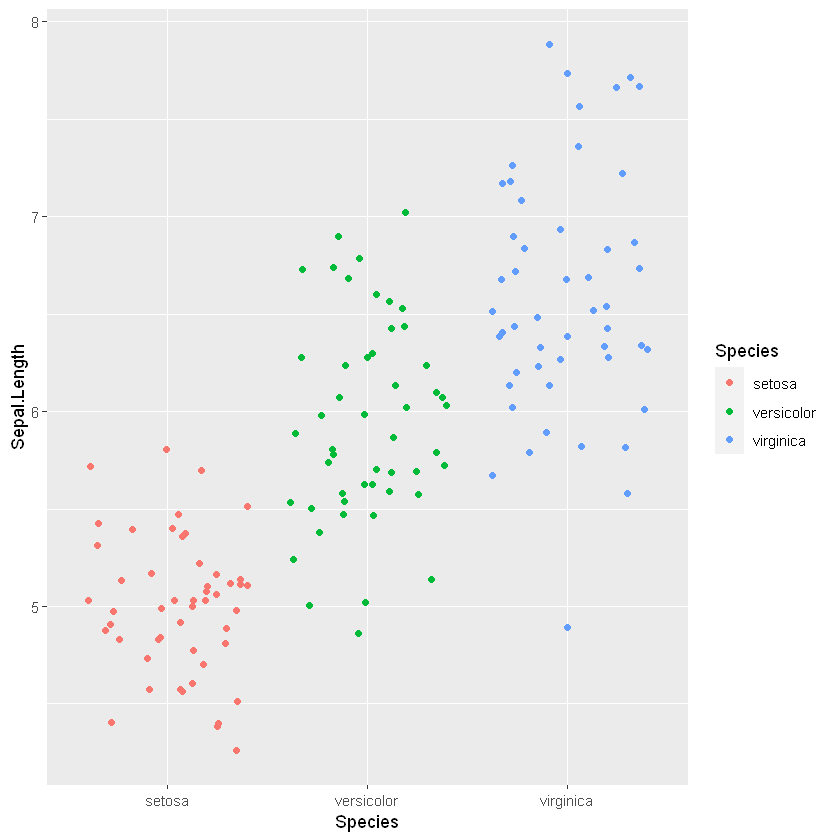

In [123]:
ggplot(iris,aes(x=Species,y=Sepal.Length))+geom_jitter(aes(color=Species))

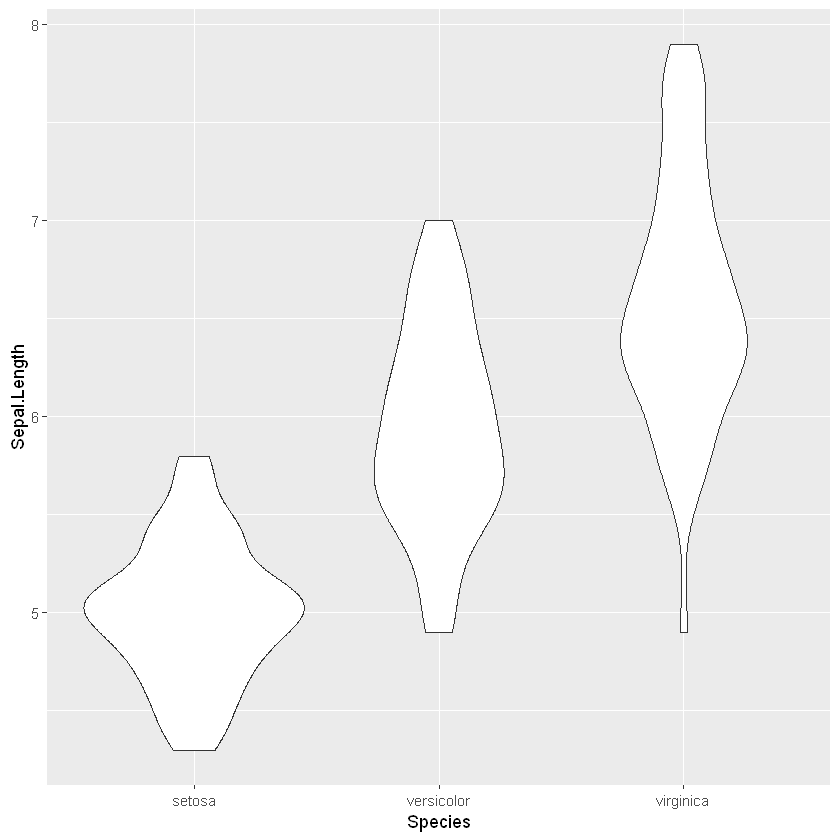

In [124]:
ggplot(iris,aes(x=Species,y=Sepal.Length))+geom_violin()

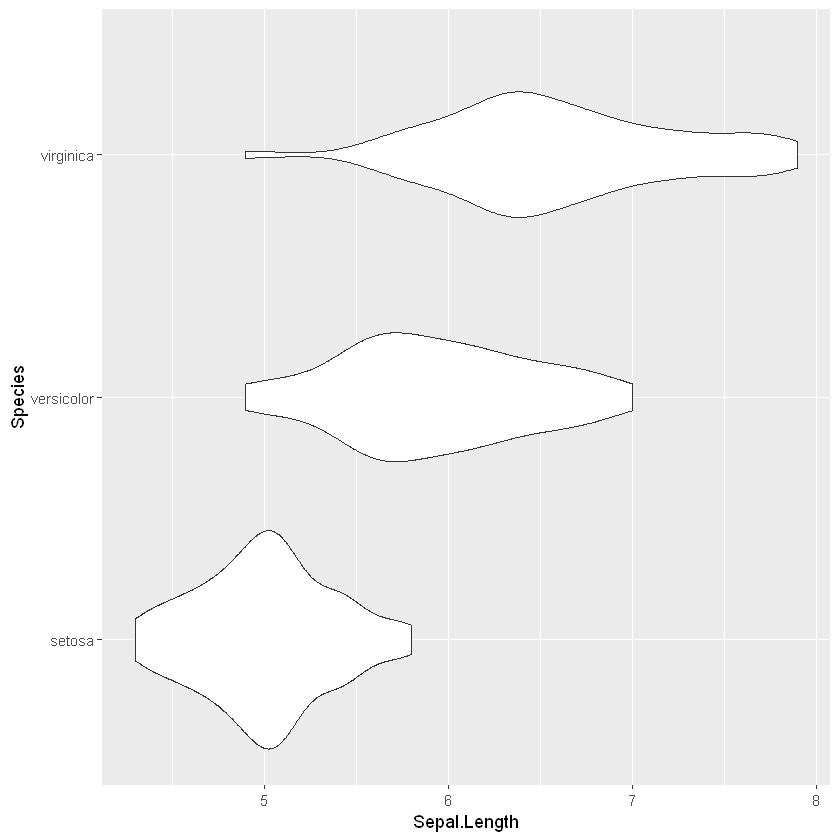

In [125]:
ggplot(iris,aes(x=Species,y=Sepal.Length))+geom_violin()+coord_flip()

## combinando gráficos

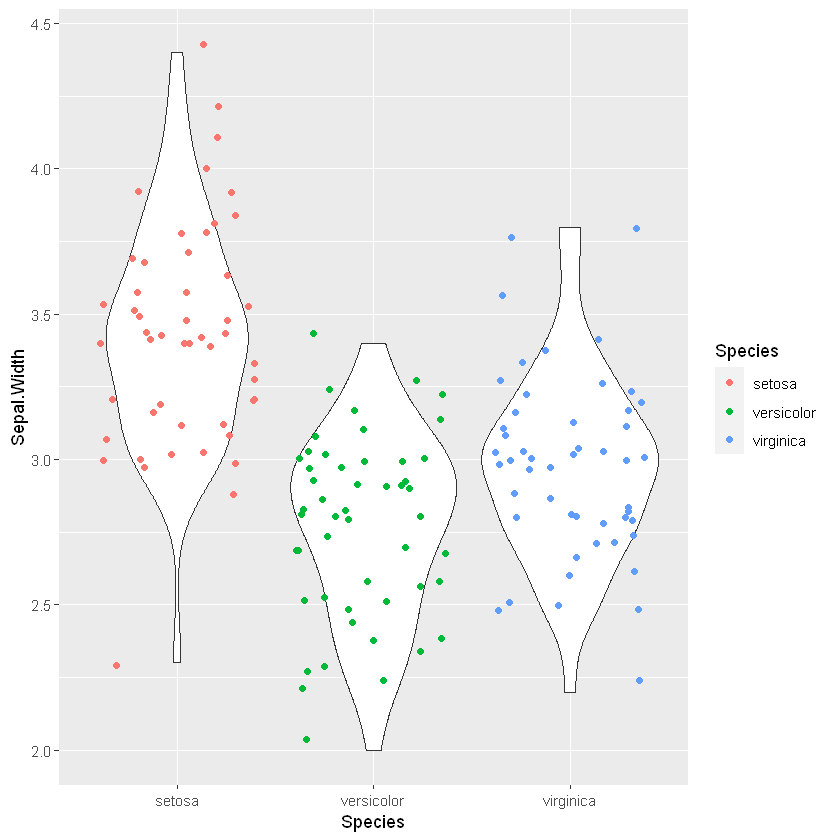

In [126]:
ggplot(iris,aes(x=Species,y=Sepal.Width))+geom_violin()+geom_jitter(aes(color=Species))

# Datasets

## Dataset mtcars

In [ ]:
attach(mtcars)

In [ ]:
View(mtcars)

## dataset diamonds

In [ ]:
data("diamonds")

In [ ]:
head(diamonds,20)

## dataset iris

In [ ]:
data("iris")

In [ ]:
head(iris,15)

In [ ]:
data("ChickWeight")

In [ ]:
str(ChickWeight)

In [ ]:
head(ChickWeight,15)

# sample()

In [ ]:
help(sample)

In [ ]:
x <- 1:20

In [ ]:
x

In [ ]:
sample(x,5) #a random permutation

In [ ]:
sample(x, replace=TRUE)